In [26]:
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import mne

Opening raw data file Reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/Q01B_Q012_raw.fif...
Isotrak not found
    Range : 6079 ... 8901 =     24.316 ...    35.604 secs
Ready.
Reading 0 ... 2822  =      0.000 ...    11.288 secs...


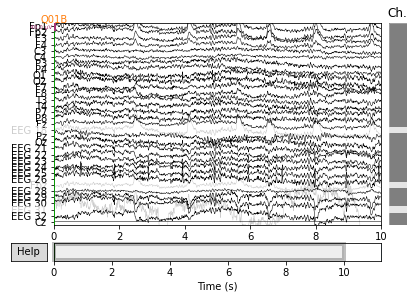

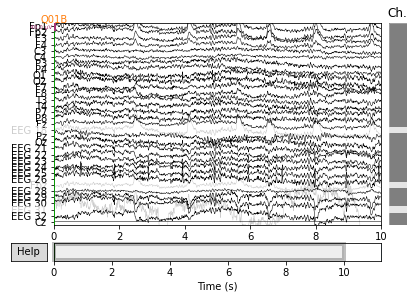

In [11]:
rawQ1 = mne.io.read_raw_fif('Reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/Q01B_Q012_raw.fif', preload=True)
rawQ1.rename_channels(mapping={'EEG 1': 'Fp1', 'EEG 2': 'Fp2', 'EEG 3': 'F3', 'EEG 4': 'F4', 'EEG 5': 'C3', \
                               'EEG 6': 'C4', 'EEG 7': 'P3', 'EEG 8': 'P4', 'EEG 9': 'O1', 'EEG 10': 'O2', \
                               'EEG 11': 'F7', 'EEG 12': 'F8', 'EEG 13': 'T3', 'EEG 14': 'T4', 'EEG 15': 'P7', \
                               'EEG 16': 'P8', 'EEG 17': 'Fz', 'EEG 19': 'Pz', 'EEG 20': 'Oz', 'EEG 27': 'Fpz', \
                               'EEG VREF': 'Cz'})
rawQ1.plot(n_channels=33)

Opening raw data file Reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/Q012_Q02B_raw.fif...
Isotrak not found
    Range : 8901 ... 10150 =     35.604 ...    40.600 secs
Ready.
Reading 0 ... 1249  =      0.000 ...     4.996 secs...


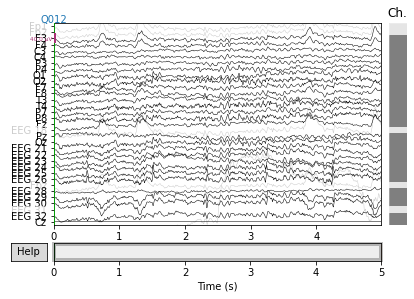

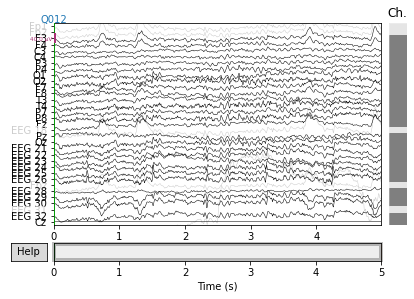

In [12]:
rawR1 = mne.io.read_raw_fif('Reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/Q012_Q02B_raw.fif', preload=True)
rawR1.rename_channels(mapping={'EEG 1': 'Fp1', 'EEG 2': 'Fp2', 'EEG 3': 'F3', 'EEG 4': 'F4', 'EEG 5': 'C3', \
                               'EEG 6': 'C4', 'EEG 7': 'P3', 'EEG 8': 'P4', 'EEG 9': 'O1', 'EEG 10': 'O2', \
                               'EEG 11': 'F7', 'EEG 12': 'F8', 'EEG 13': 'T3', 'EEG 14': 'T4', 'EEG 15': 'P7', \
                               'EEG 16': 'P8', 'EEG 17': 'Fz', 'EEG 19': 'Pz', 'EEG 20': 'Oz', 'EEG 27': 'Fpz', \
                               'EEG VREF': 'Cz'})
rawR1.plot(n_channels=33)

In [14]:
print(rawQ1.info)

<Info | 10 non-empty values
 bads: 3 items (EEG 31, Fpz, EEG 18)
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, P7, ...
 chs: 33 EEG
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 125.0 Hz
 meas_date: 2018-09-18 16:06:20 UTC
 meas_id: 4 items (dict)
 nchan: 33
 projs: []
 sfreq: 250.0 Hz
>


In [17]:
print(rawQ1.ch_names[:5])

['Fp1', 'Fp2', 'F3', 'F4', 'C3']


In [25]:
data, times = rawQ1[:, :]
print(data.shape)

(33, 2823)


In [44]:
rawQ1.info['bads']

['EEG 31', 'Fpz', 'EEG 18']

EEG 18 skipped -- Bad channel
Fpz skipped -- Bad channel
EEG 31 skipped -- Bad channel


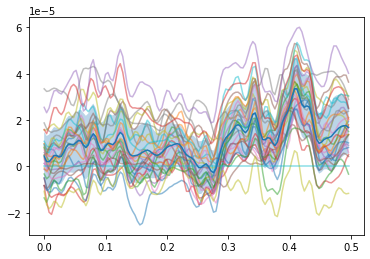

In [73]:
raw_seg = rawQ1

erp_seg = [] 
for i in range(33):
    good_ch_bool = True
    for bad_ch in rawQ1.info['bads']:
        if raw_seg.ch_names[i] == bad_ch:
            print( raw_seg.ch_names[i] + " skipped -- Bad channel")
            good_ch_bool = False
    if good_ch_bool:
        plt.plot(times[:125], data[i, :125], alpha=0.5, label= raw_seg.ch_names[i])
        erp_seg.append(data[i, :125])
        
erp_seg = np.array(erp_seg)
erp_mean = np.mean(erp_seg, axis=0)
erp_std = np.std(erp_seg, axis=0)

plt.plot(times[:125], erp_mean)
plt.fill_between(times[:125], erp_mean-erp_std, erp_mean+erp_std, alpha=0.3)

In [71]:
def segment_level_erp(raw_seg):
    erp_seg = [] 
    for i in range(33):
        good_ch_bool = True
        for bad_ch in rawQ1.info['bads']:
            if raw_seg.ch_names[i] == bad_ch:
                print( raw_seg.ch_names[i] + " skipped -- Bad channel")
                good_ch_bool = False
        if good_ch_bool:
            # plt.plot(times[:125], data[i, :125], alpha=0.5, label= raw_seg.ch_names[i])
            erp_seg.append(data[i, :125])

    erp_seg = np.array(erp_seg)
    erp_mean = np.mean(erp_seg, axis=0)
    erp_std = np.std(erp_seg, axis=0)
    
    return times[:125], erp_mean, erp_std
    

EEG 18 skipped -- Bad channel
Fpz skipped -- Bad channel
EEG 31 skipped -- Bad channel


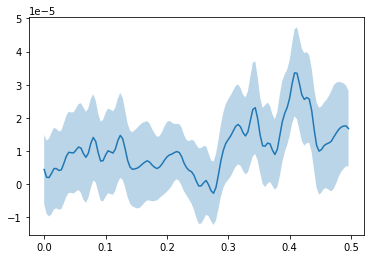

In [72]:
times_Q1, erp_mean_Q1, erp_std_Q1 = segment_level_erp(rawQ1)
plt.plot(times_Q1, erp_mean_Q1)
plt.fill_between(times_Q1, erp_mean_Q1-erp_std_Q1, erp_mean_Q1+erp_std_Q1, alpha=0.3)

#d : 3,5,10,13,16,17,21

#a : 2,4,7,9,15,19,20

#s : 1,6,8,11,12,14,18


In [74]:
depression_nos = [3,5,10,13,16,17,21]
anxiety_nos = [2,4,7,9,15,19,20]
stress_nos = [1,6,8,11,12,14,18]

In [76]:
subject_dir = 'Reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/'
for d in depression_nos:
    Q_name = 'Q0'+ str(d) + 'B_Q0' + str(d) + '2_raw.fif'
    raw_fif_name = subject_dir + Q_name
    
    mne.io.read_raw_fif(raw_fif_name, preload=True)
    times_Q, erp_mean_Q, erp_std_Q = segment_level_erp(rawQ)
    plt.plot(times_Q, erp_mean_Q)
    plt.fill_between(times_Q, erp_mean_Q-erp_std_Q, erp_mean_Q+erp_std_Q1, alpha=0.3)

Opening raw data file Reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/Q03B_Q032_raw.fif...


FileNotFoundError: [Errno 2] No such file or directory: '/media/pranav/New Volume/ghot_intensifies/Graph-Alz-DASS/DASS_21_pranav_mnestudy/Reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/Q03B_Q032_raw.fif'